In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
df = pd.read_csv('wine_quality.csv')
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
# Define features and y values
y = df['quality']
features = df.drop(columns=['quality'])

In [5]:
## 1. Data transformation
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(features).transform(features)

In [9]:
## 2. Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=99, test_size=0.2)

In [12]:
## 3. Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression

clf_no_reg = LogisticRegression(penalty=None)
clf_no_reg.fit(X_train, y_train)

LogisticRegression(penalty=None)

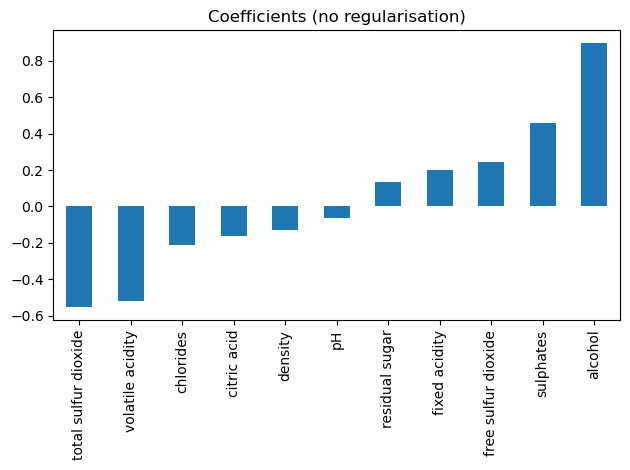

In [13]:
## 4. Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()
coef.plot(kind='bar', title='Coefficients (no regularisation)')
plt.tight_layout()
plt.show()

In [15]:
## 5. Training and test performance
from sklearn.metrics import f1_score

y_pred_test = clf_no_reg.predict(X_test)
y_pred_train = clf_no_reg.predict(X_train)
print('Training Score: ', f1_score(y_train, y_pred_train))
print('Testing Score: ', f1_score(y_test, y_pred_test))

Training Score:  0.7727598566308242
Testing Score:  0.7266666666666667
